# Name: Zakriya Ijaz
# Reg No: FA22-BBD-046
# Course: Machine Learning
# Project: E-Commerce Product Recommendation Using Machine Learning

# Data_Set Source: Kaggle.com

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
file_path = r'C:\Users\lenovo\Downloads\clean_data.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"premium, beauty, premium, makeup, premium, nai..."
1,1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,3,4,3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,4,990,3,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4090 non-null   int64  
 1   ID           4090 non-null   int64  
 2   ProdID       4090 non-null   int64  
 3   Rating       4090 non-null   float64
 4   ReviewCount  4090 non-null   float64
 5   Category     4081 non-null   object 
 6   Brand        3994 non-null   object 
 7   Name         4090 non-null   object 
 8   ImageURL     4090 non-null   object 
 9   Description  3174 non-null   object 
 10  Tags         4090 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 351.6+ KB


In [6]:
 data.describe()

,Unnamed: 0,ID,ProdID,Rating,ReviewCount
count,4090.000000,4.090000e+03,4.090000e+03,4090.000000,4090.000000
mean,2398.504401,-2.159465e+07,-9.349951e+07,1.900000,392.111002
std,1456.270992,2.628113e+08,4.609920e+08,2.188882,2091.181662
min,0.000000,-2.147484e+09,-2.147484e+09,0.000000,0.000000
25%,1120.250000,7.000000e+00,7.000000e+00,0.000000,0.000000
50%,2360.500000,7.600000e+01,7.300000e+01,0.000000,3.000000
75%,3657.750000,2.351750e+03,1.678750e+03,4.400000,64.000000
max,4997.000000,1.986863e+09,2.135948e+09,5.000000,29242.000000


In [7]:
data.isnull().sum()

Unnamed: 0       0
ID               0
ProdID           0
Rating           0
ReviewCount      0
Category         9
Brand           96
Name             0
ImageURL         0
Description    916
Tags             0
dtype: int64

### Dropping irrelevant columns


In [8]:
data_cleaned = data.drop(columns=["Unnamed: 0", "ID", "ProdID", "ImageURL", "Name"])

### Handling missing values




In [9]:
data_cleaned['Category'] = data_cleaned['Category'].fillna('Unknown')

In [10]:
data_cleaned['Brand'] = data_cleaned['Brand'].fillna('Unknown')

In [11]:
data_cleaned['Description'] = data_cleaned['Description'].fillna('')

In [12]:
data_cleaned.isnull().sum()

Rating         0
ReviewCount    0
Category       0
Brand          0
Description    0
Tags           0
dtype: int64

In [13]:
data_cleaned.head(5)

,Rating,ReviewCount,Category,Brand,Description,Tags
0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,,"premium, beauty, premium, makeup, premium, nai..."
1,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


# Step 1 Perform EDA

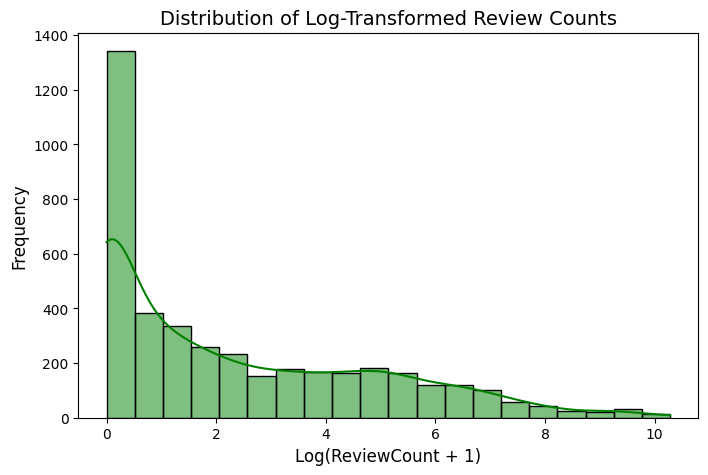

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['ReviewCount'].apply(lambda x: x + 1).apply(np.log), kde=True, color='green', edgecolor='black')
plt.title('Distribution of Log-Transformed Review Counts', fontsize=14)
plt.xlabel('Log(ReviewCount + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


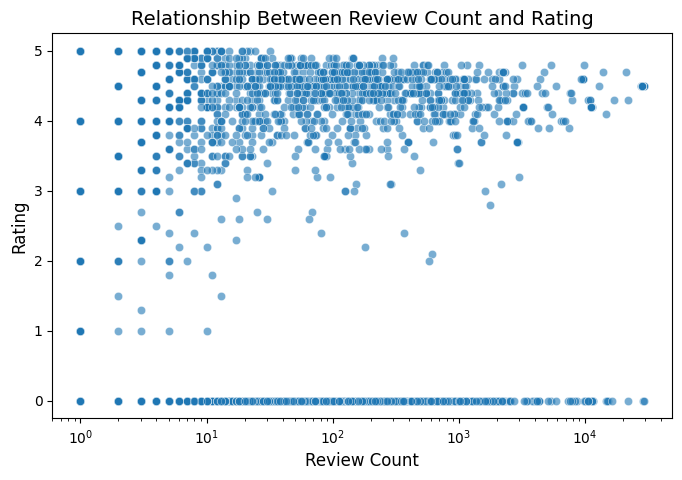

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_cleaned, x='ReviewCount', y='Rating', alpha=0.6)
plt.title('Relationship Between Review Count and Rating', fontsize=14)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xscale('log')  
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_20264\1317328554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_brands_data, x='Brand', y='Rating', palette='Set2')


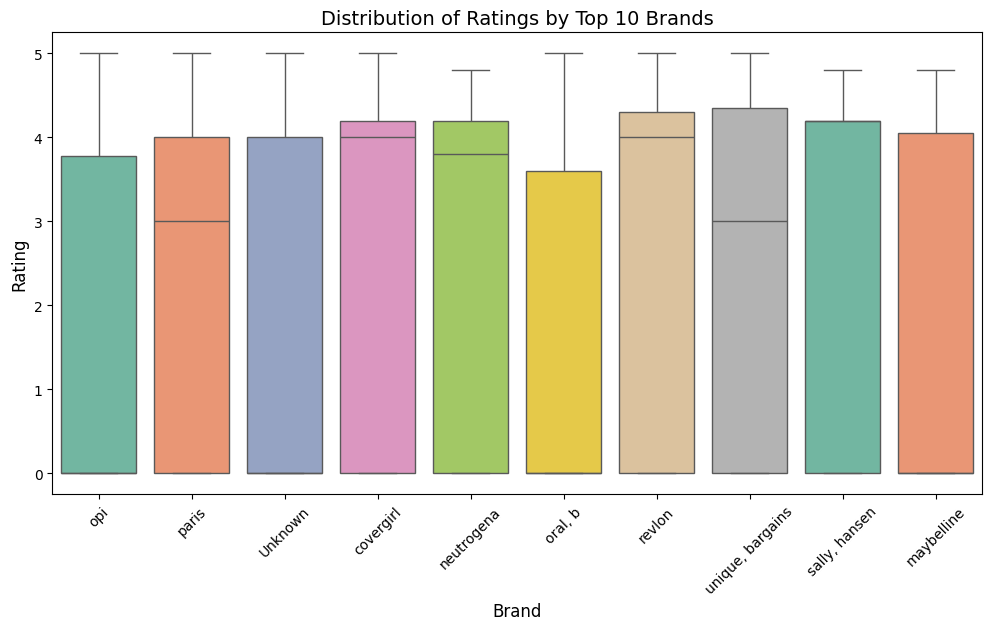

In [16]:
top_brands = data_cleaned['Brand'].value_counts().head(10).index
top_brands_data = data_cleaned[data_cleaned['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands_data, x='Brand', y='Rating', palette='Set2')
plt.title('Distribution of Ratings by Top 10 Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

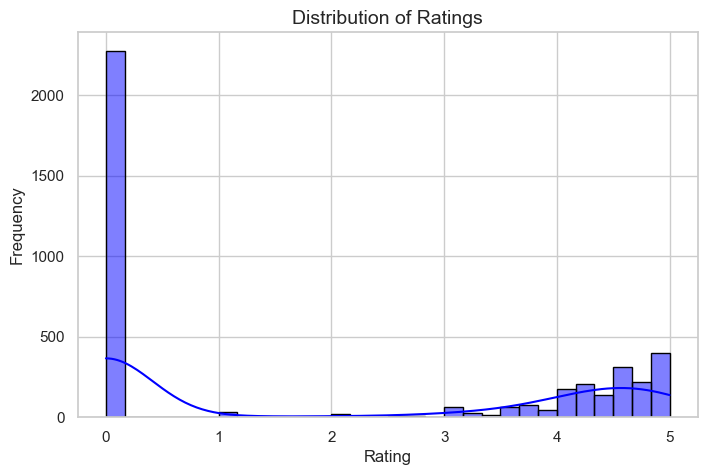

In [17]:
sns.set(style='whitegrid')


plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Rating'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


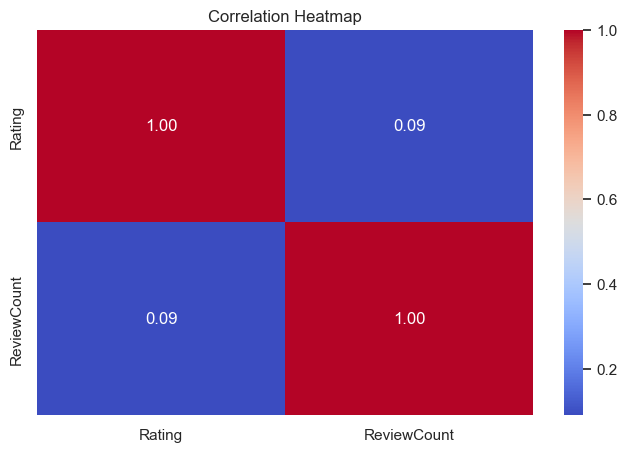

In [18]:
plt.figure(figsize=(8, 5))
numeric_data = data_cleaned[['Rating', 'ReviewCount']]
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 2: Feature engineering: Preparing data for classification

## Binary target variable
###  Starting with numerical features

In [26]:
data['HighRating'] = (data['Rating'] > 4).astype(int)  
features = ['ReviewCount']  

## Encoding categorical variables

In [28]:
categorical_features = ['Category', 'Brand', 'Tags']

In [29]:
encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

## Dep & Indep Var

In [31]:
X = pd.concat([data[features], encoded_data], axis=1)
y = data['HighRating']

### Split into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape

(2863, 6003)

In [44]:
X_test.shape

(1227, 6003)

In [45]:
y_train.shape

(2863,)

In [46]:
y_test.shape

(1227,)

### Define models to evaluate

In [33]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


### Train and evaluate models

In [34]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

### Create a DataFrame for visualization

In [35]:
evaluation_df = pd.DataFrame(results)
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.697637,0.593985,0.199495,0.298677
1,Logistic Regression,0.660962,0.424242,0.141414,0.212121
2,Gradient Boosting,0.701711,0.542135,0.487374,0.513298


# Step 3: Observation

## Evaluation Metrics Explained
1. **Accuracy**: Measures the overall correctness of the model's predictions but may be misleading in imbalanced datasets.
2. **Precision**: Indicates the proportion of positive predictions that were actually correct. High precision minimizes false positives.
3. **Recall**: Measures how well the model identifies actual positives. High recall minimizes false negatives.
4. **F1-Score**: The harmonic mean of Precision and Recall, balancing both metrics. It’s particularly useful in cases of imbalanced classes.

## Analysis
- **Random Forest**:
  - Moderate accuracy and precision.
  - Low recall, indicating it struggles to capture true positive cases.
  - The F1-Score is low due to poor balance between precision and recall.

- **Logistic Regression**:
  - Lowest scores across all metrics, suggesting it is the least effective for this dataset.

- **Gradient Boosting**:
  - Best accuracy at 0.702.
  - High recall (0.487) and precision (0.542), resulting in the highest F1-Score (0.513).
  - This balance between precision and recall makes it the most reliable model for identifying high-rated products.

## Conclusion
The **Gradient Boosting model** is the best choice because:
1. It achieves the highest F1-Score, balancing both precision and recall.
2. It has the highest accuracy and performs well in identifying true positives (recall).

This makes Gradient Boosting the most effective model for predicting `HighRating` in this scenario.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20264\2403653449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y=metric, ax=axes[i], palette="pastel")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20264\2403653449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y=metric, ax=axes[i], palette="pastel")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20264\2403653449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y=metric, ax=axes[i], palette="pastel")
C:\Users\lenovo\AppDat

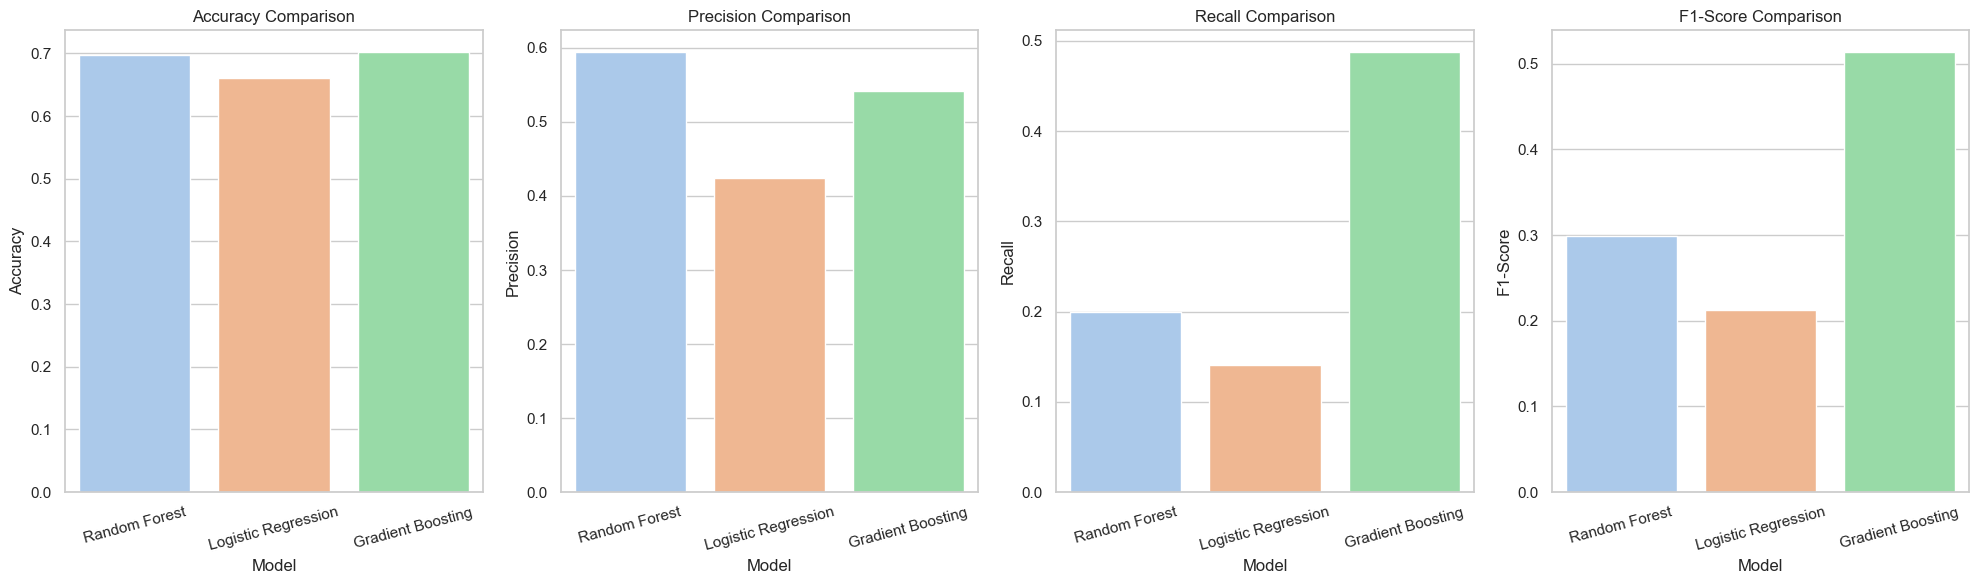

In [40]:
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [0.697637, 0.660962, 0.701711],
    'Precision': [0.593985, 0.424242, 0.542135],
    'Recall': [0.199495, 0.141414, 0.487374],
    'F1-Score': [0.298677, 0.212121, 0.513298]
}


df = pd.DataFrame(data)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, metric in enumerate(metrics):
    sns.barplot(data=df, x='Model', y=metric, ax=axes[i], palette="pastel")
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


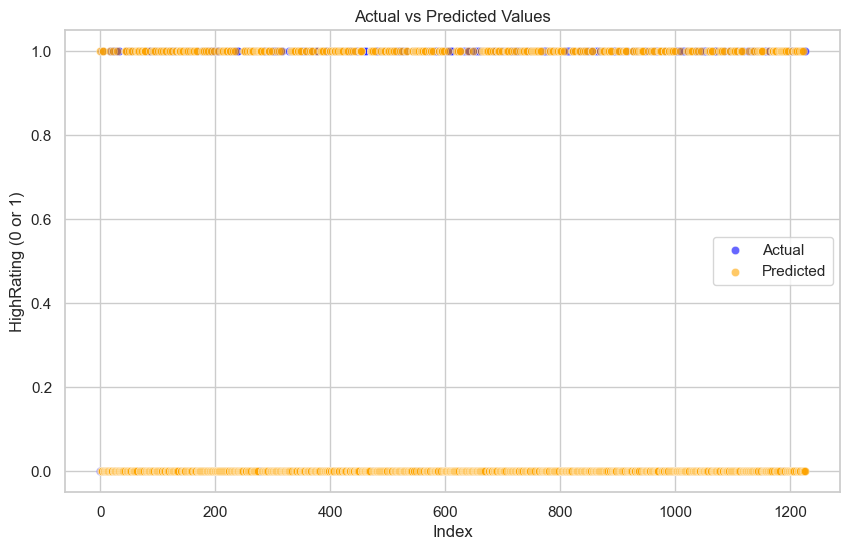

In [41]:
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})


plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(comparison_df)), y=comparison_df['Actual'], label='Actual', color='blue', alpha=0.6)
sns.scatterplot(x=range(len(comparison_df)), y=comparison_df['Predicted'], label='Predicted', color='orange', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('HighRating (0 or 1)')
plt.legend()
plt.show()
